# What are the most demanded skills for the top 3 most popular data roles?

### Methodology:

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [25]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filtered df (Hungary)
df_HU = df[df['job_country'] == 'Hungary'].copy()

# Explode skills
df_skills = df_HU.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
72,Performance Analyst,power bi
443,R&D PMO Manager & Data Engineer | KUKA AG,sql
443,R&D PMO Manager & Data Engineer | KUKA AG,sharepoint
999,Performance Analyst,sap
1326,SQL Data Engineer,sql
...,...,...
785579,Data Engineer,sql
785579,Data Engineer,sql server
785579,Data Engineer,azure
785579,Data Engineer,power bi


In [7]:
# Count skills with grouping
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')

# Sort values
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
610,python,Data Engineer,334
780,sql,Data Engineer,327
779,sql,Data Analyst,306
198,excel,Data Analyst,264
609,python,Data Analyst,195
...,...,...,...
417,macos,Data Scientist,1
416,macos,Cloud Engineer,1
737,snowflake,Cloud Engineer,1
414,looker,Senior Data Scientist,1


In [12]:
# Check unique job titles
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Find the top 3 job titles
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

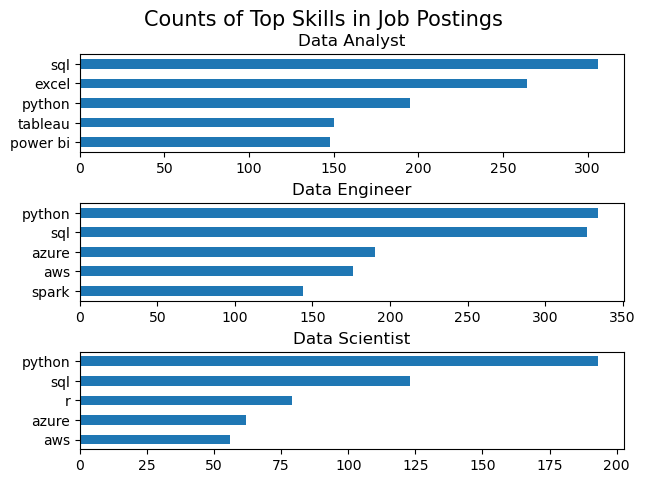

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
df_job_title_count = df_HU['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,639
1,Data Engineer,518
2,Data Scientist,309
3,Business Analyst,236
4,Software Engineer,228
5,Senior Data Engineer,168
6,Machine Learning Engineer,93
7,Senior Data Scientist,69
8,Senior Data Analyst,69
9,Cloud Engineer,58


In [22]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_percent['skill_percent'] = (df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100

df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,334,518,64.478764
1,sql,Data Engineer,327,518,63.127413
2,sql,Data Analyst,306,639,47.887324
3,excel,Data Analyst,264,639,41.314554
4,python,Data Analyst,195,639,30.516432
...,...,...,...,...,...
907,macos,Data Scientist,1,309,0.323625
908,macos,Cloud Engineer,1,58,1.724138
909,snowflake,Cloud Engineer,1,58,1.724138
910,looker,Senior Data Scientist,1,69,1.449275


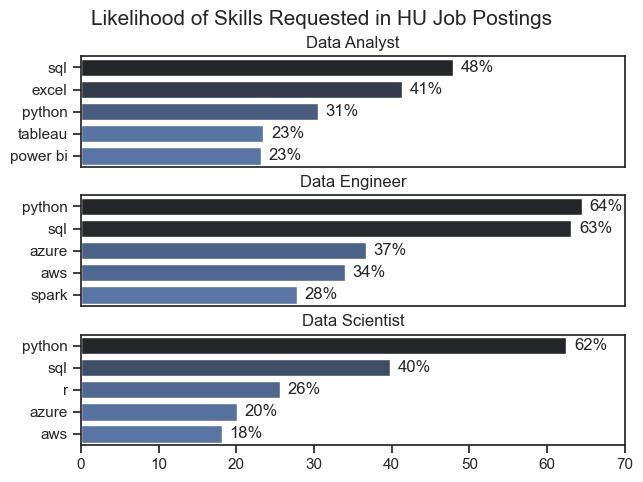

In [39]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in HU Job Postings', fontsize=15)
fig.tight_layout(pad=0.5)
plt.show()